In [1]:
from torchvision import models 
import torch
import torch.nn as nn  
import torch.optim as optim
import torch.nn.functional as F 
import numpy as np 
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
torch.set_warn_always(False)

from PIL import Image 
import requests
from io import BytesIO

In [2]:
resNet = models.resnet101(pretrained = True)
transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop(224), 
    transforms.ToTensor(), transforms.Normalize(
        mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]
    )
])

c:\Users\ghora\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ghora\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to C:\Users\ghora/.cache\torch\hub\checkpoints\resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:17<00:00, 10.5MB/s] 


In [3]:
print(resNet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

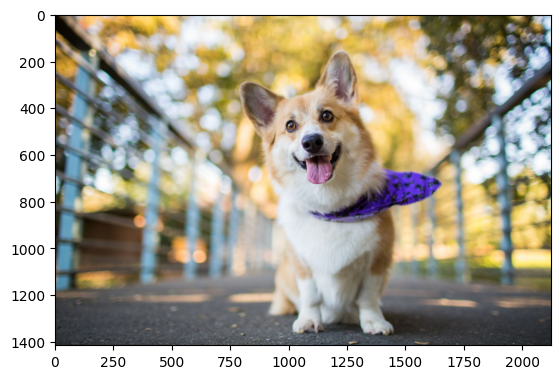

In [9]:
response = requests.get('https://www.thesprucepets.com/thmb/87E0I-gV5RuaxXtUMjvRdy3l3fk=/2123x1415/filters:fill(auto,1)/GettyImages-158783993-572b68a55f9b58c34c3f125b.jpg')
img = Image.open(BytesIO(response.content))
plt.imshow(img);

In [10]:
img_t = transform(img)
batch = torch.unsqueeze(img_t, 0) # to make it suitable for model
resNet.eval()
pred = resNet(batch)
print(pred.shape)

torch.Size([1, 1000])


In [11]:
!git clone https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
with open('942d3a0ac09ec9e5eb3a/imagenet1000_clsidx_to_labels.txt') as f :
    classes = [line.strip() for line in f.readlines()]

fatal: destination path '942d3a0ac09ec9e5eb3a' already exists and is not an empty directory.


In [12]:
labels = []
for label in classes : 
    labels.append(label.rsplit(':')[1])

print(labels)

[" 'tench, Tinca tinca',", " 'goldfish, Carassius auratus',", " 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',", " 'tiger shark, Galeocerdo cuvieri',", " 'hammerhead, hammerhead shark',", " 'electric ray, crampfish, numbfish, torpedo',", " 'stingray',", " 'cock',", " 'hen',", " 'ostrich, Struthio camelus',", " 'brambling, Fringilla montifringilla',", " 'goldfinch, Carduelis carduelis',", " 'house finch, linnet, Carpodacus mexicanus',", " 'junco, snowbird',", " 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',", " 'robin, American robin, Turdus migratorius',", " 'bulbul',", " 'jay',", " 'magpie',", " 'chickadee',", " 'water ouzel, dipper',", " 'kite',", " 'bald eagle, American eagle, Haliaeetus leucocephalus',", " 'vulture',", " 'great grey owl, great gray owl, Strix nebulosa',", " 'European fire salamander, Salamandra salamandra',", " 'common newt, Triturus vulgaris',", " 'eft',", " 'spotted salamander, Ambystoma maculatum',", " 'axo

In [13]:
_, index = torch.max(pred, 1)
pecentage = torch.nn.functional.softmax(pred, dim=1)[0]*100
print(labels[index[0]], pecentage[index[0]].item())

 'Pembroke, Pembroke Welsh corgi', 97.16386413574219
